# Zomato Data Analysis

<h2>Explaing The Data Set</h2>

<b>Q1.a)</b>Explain the dataset in your own words. Focus on attribute description <br>
<b>Ans: </b> The dataset contains the data related to various restaurants from Zomato.com. It includes various attributes like url, address, name, whether the restaurant is available for online order or not and so on which is explained in detail as follows:
<ul>
    <li>URL: Contains the link of the url from Zomato.com where details realated to restaurant is displayed</li>
    <li>ADDRESS: Shows the address of the restaurant</li>
    <li>NAME: Shows the name of the restaurant</li>
    <li>ONLINE_ORDER: Shows if the restaurant accepts online order or not. Response are in Yes or No</li>
    <li>BOOK_TABLE: Shows if a person has an option to book a table in the respective restaurant or not. Response is usually in the form of Yes or No</li>
    <li>RATE: Show the average rating of the restaurant. Usually in the form of int.</li>
    <li>VOTES: Shows the number of votes recieved by the restaurant. Usually the values are in the form of int.</li>
    <li>PHONE: Show the phone number of the restaurant. Values are in int.</li>
    <li>LOCATION: Show the current location of the restaurant. Values are in string.</li>
    <li>REST_TYPE: Shows the details related to type of restaurant it is. Whether it is Casual Dining or Cafe,etc. Values are separated by comma and are in the form of string </li>
    <li>DISH_LIKED: Shows the type of dishes that a person usually likes in the restaurant. All the dishes are separeted by comma</li>
    <li>CUISINES: Shows the various types of cuisines available in that restaurant. All the cuisines are separated by comma</li>
    <li>APPROX_COST: Show how much would it cost for 2 people to eat in that restaurnt. Usually in int format</li>
    <li>REVIEWS_LIST: Shows the reviews related to the restaurant. Usually in the form of JSON</li>
    <li>MENU_ITEM: Shows the menu related to the restaurant. Usually in the form of an array</li>
    <li>LISTED_IN(TYPE): Shows the type of meal is listed in. Whether its a buffet ,etc</li>
    <li>LISTED_IN(CITY): Shows the current city of the restaurant</li>
</ul>

<h2>Data Preprocessing And Understanding</h2>

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading Data

<b>Q2 a)</b> Loading csv data into a pandas dataframe.

In [2]:
path = "zomato.csv"
zomato_df = pd.read_csv(path)
print('data shape', zomato_df.shape)
zomato_df.head()

data shape (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Exploration and Preprocessing


### Cleaning blank values

<b> Q2 c) </b> Are there restaurant duplicates in the data? Detect and if there is, clean it. <br>
<b> Ans </b> Yes there are restaurants with duplicate values. For this purpose we analyzed the data and came up with attributes that are causing the data to be duplicate like address, listed type and listed city. Using these attributes we dropped all the rows those rows that are duplicate using drop_deplicates function of pandas and drop all the null values from the data Set. We see the size of the data set and we find that records have been successfully dropped. The code for the same is shown below: 

In [3]:
zomato_df = zomato_df.drop_duplicates(subset=['address','listed_in(type)','listed_in(city)'],keep=False);
zomato_df = zomato_df.dropna(inplace=False)
print('Cleaned data shape', zomato_df.shape)
zomato_df.head()

Cleaned data shape (21248, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# Remove rows with NEW as rating
zomato_df = zomato_df[zomato_df['rate'] != 'NEW']

#saving rating as a single float value
zomato_df['rate'] = zomato_df['rate'].apply(lambda x: float(x.split('/')[0])) 

<b>Q2 b) </b>Explore the data. Plot the distribution of the attributes (frequency). What trends can you find in your data? Are there attributes that are useless at this point?

In this section we have created various graphs and covariance matrices for understanding the data.
### Graph of number of people who order online on Zomato

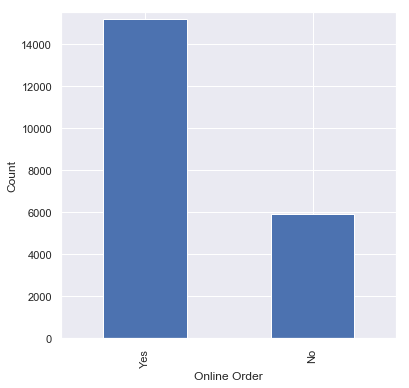

In [5]:
onlineOrderValueCount = zomato_df['online_order'].value_counts()
sns.set(rc={'figure.figsize':(6,6)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Count')
plt.xlabel('Online Order')
plt.show()

### Graph of customers who likes to do online reservations on Zomato

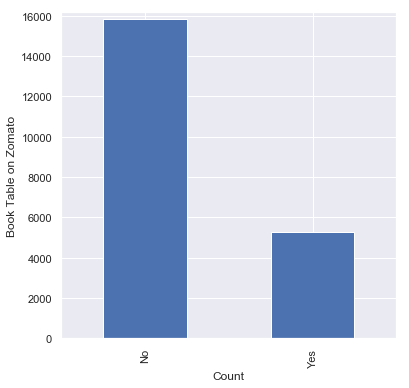

In [6]:
onlineOrderValueCount = zomato_df['book_table'].value_counts()
sns.set(rc={'figure.figsize':(6,6)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Book Table on Zomato')
plt.xlabel('Count')
plt.show()

### Graph of ratings of people vs count

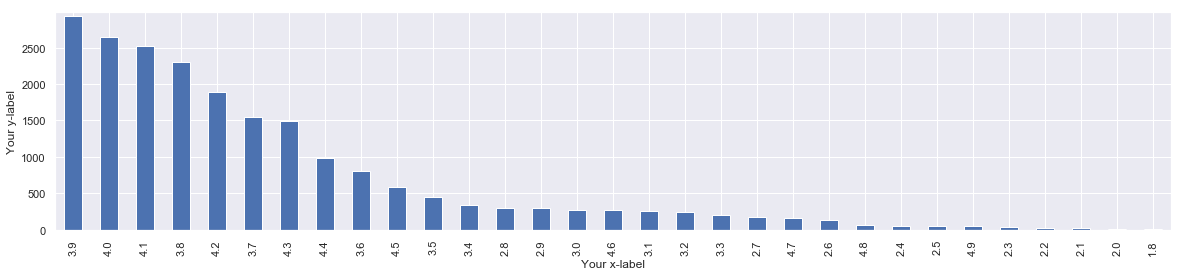

In [7]:
onlineOrderValueCount = zomato_df['rate'].value_counts()
sns.set(rc={'figure.figsize':(20,4)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Your y-label')
plt.xlabel('Your x-label')
plt.show()

### Graph of number of restaurants in a particular location

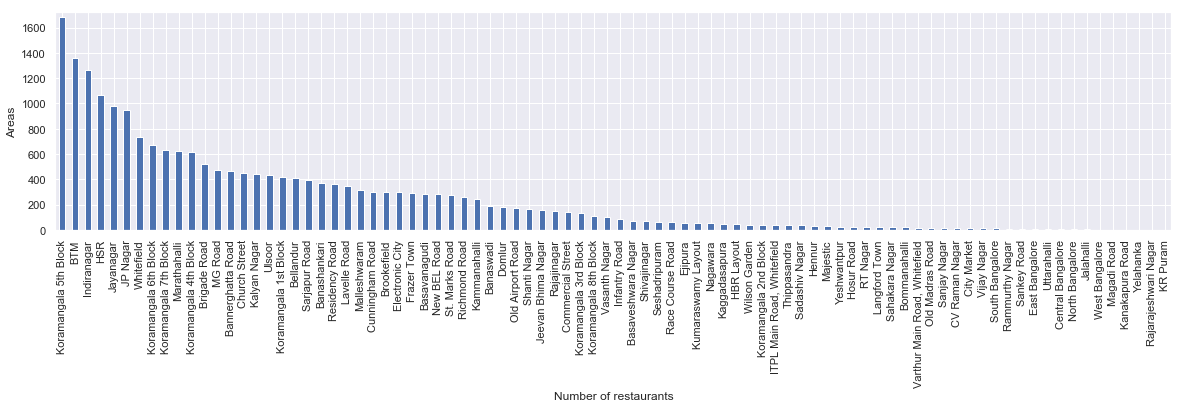

In [8]:
onlineOrderValueCount = zomato_df['location'].value_counts()
sns.set(rc={'figure.figsize':(20,4)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Areas')
plt.xlabel('Number of restaurants')
plt.show()

## Neighbourhood with the highest ratings and its characteristics 
<br> Q2 d) <br/> What is the neighborhood with the highest average rating? What are the majorcharacteristics of this neighborhood (e.g., type of restaurant, type of food they offer, etc)

<b> Ans: </b>For this purpose we cleaned the rate column by spliting it from '/' and taking the first part of array to get the actual rating of the restaurant. Then we group by the location and took the average of the rating value and sorted it in ascending order as shown in the code below. Using this we found out that restaurants in the location of 
Banashankari has the highest average rating and the characteristics of the area are:
<br>
<b>Cuisines in Banashankari are:</b> Rajasthani, Mughlai, Juices, Steak, Modern Indian, Finger Food, South Indian, Tex-Mex, Mexican, Japanese, North Indian, Italian, Thai, BBQ, Continental, Street Food, French, Spanish, Fast Food, Burger, European, Mediterranean, Beverages, Parsi, Kebab, Mangalorean, Sandwich, Ice Cream, Momos, Indonesian, Healthy Food, North Eastern, Asian, Desserts, Seafood, Chinese, Bakery, Salad, Pizza, Cafe
<br>
<b>Restaurants in Banashankari are:</b> Bar, Dessert Parlor, Irani Cafee, Pub, Microbrewery, Casual Dining, Quick Bites, Lounge, Kiosk, Bakery, Fine Dining, Beverage Shop, Cafe
<br>
The conclusions have been drawn using the following code


In [ ]:
requiredColumns = ['location', 'rest_type', 'rate', 'cuisines', 'votes']
dataSetWithRatingsAndCities = pd.DataFrame(zomato_df[requiredColumns])

dataSetWithRatingsAndCities.head()

,location,rest_type,rate,cuisines,votes
0,Banashankari,Casual Dining,4.1,"North Indian, Mughlai, Chinese",775
1,Banashankari,Casual Dining,4.1,"Chinese, North Indian, Thai",787
2,Banashankari,"Cafe, Casual Dining",3.8,"Cafe, Mexican, Italian",918
3,Banashankari,Quick Bites,3.7,"South Indian, North Indian",88
4,Basavanagudi,Casual Dining,3.8,"North Indian, Rajasthani",166


### Calculating best overall rated location

In [ ]:
meanRating = dataSetWithRatingsAndCities.groupby('location')['rate'].mean().sort_values(ascending=False)
best_rated_location = meanRating.keys()[0]
meanRating.head()

location
Lavelle Road             4.193410
Koramangala 5th Block    4.152875
St. Marks Road           4.140072
Cunningham Road          4.115232
Sankey Road              4.100000
Name: rate, dtype: float64

### Find all cuisines in best rated location

In [ ]:
all_cuisines = []

dataSetWithRatingsAndCities[dataSetWithRatingsAndCities['location'] == best_rated_location]['cuisines'].apply(lambda x: all_cuisines.extend(x.split(', ')))
all_cuisines = list(set(all_cuisines)) # get unique cuisine values
print('All the cuisines served on top rating location are:', all_cuisines)

All the cuisines served on top rating location are: ['Healthy Food', 'Steak', 'European', 'North Eastern', 'Momos', 'French', 'Mexican', 'Continental', 'Street Food', 'Finger Food', 'Desserts', 'Thai', 'Indonesian', 'Mangalorean', 'Japanese', 'Chinese', 'BBQ', 'Sandwich', 'North Indian', 'Ice Cream', 'Spanish', 'Rajasthani', 'Modern Indian', 'Italian', 'South Indian', 'Mediterranean', 'Bakery', 'Fast Food', 'Burger', 'Tex-Mex', 'Kebab', 'Salad', 'Seafood', 'Mughlai', 'Asian', 'Cafe', 'Pizza', 'Parsi', 'Juices', 'Beverages']


### Find restaurant types in best rated location

In [ ]:
all_rest_types = []
dataSetWithRatingsAndCities[dataSetWithRatingsAndCities['location'] == best_rated_location]['rest_type'].apply(lambda x: all_rest_types.extend(x.split(', ')))
all_rest_types = list(set(all_rest_types)) # get unique restaurant types only
print('All the restaurant types in top rating location are:', all_rest_types)

All the restaurant types in top rating location are: ['Casual Dining', 'Kiosk', 'Beverage Shop', 'Fine Dining', 'Bakery', 'Bar', 'Cafe', 'Microbrewery', 'Pub', 'Irani Cafee', 'Quick Bites', 'Dessert Parlor', 'Lounge']


# Predicting cost of two people in a restaurant

<b>Q3 a)</b> Explain what is the task you’re solving (e.g., supervised x unsupervised, classification xregression x clustering or similarity matching x etc) ?<br>
<b>A:</b> Since the problem statement involves predicting the price of the 2 people in a particular restaurant, it is a supervised learning where we have a target variable i.e to predict the cost and all other parameters are the input variables. Since its a supervised learning it is a regression problem since we were trying to predict the value of cost. If we were given a value of cost and we had to predict if the predicted cost would be greater or less than any particualar value then it would be a classification problem

<b>Q3 b)</b> What models will you choose? Why? <br>
<b>A:</b> Since the problem is a regression problem, we decide to use regressor models like tree Tree Regressor, SVM Regressor and Linear Regressor.

<b>Q3 b)</b> Which metrics will you use to evaluate your model? <br>
<b>A:</b> Since it's a regression problem, we would use mean square error method to determine the average error in each model used and using theis matrics we find out the model with the least error to be the most efficient and use the prediction from that model as our final result. <br>
Since the problem is not a classification problem, we cannot use accuracy, f-measure, precision and recall for this problem statement.

<b>Q3 d)</b> How do you make sure not to overfit? <br>
<b>A:</b> In order to make sure that the data does not overfit on the model the following steps were taken:
<br>
<ul>
    <li><b>Genralizing the data correctly: </b>Certain instances like the cuisines those were separated by comma were removed and new records of the same were created leading to reduced sparcity and high genralization of the data</li>
    <li><b>Cross Validation of the data set: </b>Except for training and test data, a certain part of the dataset was taken as validation data and was also tested against to make sure that the data does not overfit.</li>
</ul>

<b>Q3 e)</b> Build your model and verify how it performs (using the metrics you have chosen inSection 3(c)) in your training data. Justify which evaluation approach you are using?(Out of sample validation or Cross-validation). Use a plot to justify your findings. How good is your model?
<br>


### Using Cuisines Column For Label encoding and One Hot Encoding

In order to use the cuisines column effectively we observe that the column is separated by comma. One hot encoding the cuisines column would lead to a lot of redundant rows and would increase the sparsity of the data set. To reduce the sparcity we clean the cuisines column by spliting the comma separated values and creating new records for each and every cuisines. By using the shape method, we observe that number of rows have increased. The same has been implemented in the following code. 

In [ ]:
X = zomato_df[['location', 'rate', 'rest_type', 'cuisines', 'approx_cost(for two people)']]
# Y = zomato_df['approx_cost(for two people)'].apply(lambda x: float(x.replace(',','')))
X[:20]

,location,rate,rest_type,cuisines,approx_cost(for two people)
0,Banashankari,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Banashankari,4.1,Casual Dining,"Chinese, North Indian, Thai",800
2,Banashankari,3.8,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Banashankari,3.7,Quick Bites,"South Indian, North Indian",300
4,Basavanagudi,3.8,Casual Dining,"North Indian, Rajasthani",600
5,Basavanagudi,3.8,Casual Dining,North Indian,600
7,Banashankari,4.6,"Casual Dining, Cafe","Pizza, Cafe, Italian",600
8,Banashankari,4.0,Cafe,"Cafe, Italian, Continental",700
9,Banashankari,4.2,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550
10,Banashankari,4.1,Cafe,Cafe,500


In [ ]:
all_cuisines = []
all_rest_types = []

X['cuisines'].apply(lambda x: all_cuisines.extend(x.split(', ')))
X['rest_type'].apply(lambda x: all_rest_types.extend(x.split(', ')))

all_cuisines = list(set(all_cuisines))
all_rest_types = list(set(all_rest_types))
print(len(all_cuisines), len(all_rest_types))

97 21


In [ ]:
list_X = []

def strech_data(x):
    multiple_cuisines = x['cuisines'].split(', ')
    multiple_rest_types = x['rest_type'].split(', ')
    for cusine in multiple_cuisines:
        for rest_type in multiple_rest_types:
            x['cuisines'] = cusine
            x['rest_type'] = rest_type
            list_X.append(x.tolist())
    return None
X.apply(lambda x: strech_data(x), axis=1)
len(list_X)

73445

In [ ]:
streched_data = pd.DataFrame.from_records(list_X, columns=X.columns)
streched_data.head()
le = preprocessing.LabelEncoder()
encoded_X = streched_data[['location', 'rest_type', 'cuisines']].apply(le.fit_transform)
encoded_X['rate'] = streched_data['rate']
Y = streched_data['approx_cost(for two people)'].apply(lambda x: float(x.replace(',','')))
encoded_X.shape

(73445, 4)

In [ ]:
Y.shape

(73445,)

### Decision Tree Regressor

In [ ]:
#spliting the dataset into test and training dataset 
X_train, X_test, y_train, y_test =  train_test_split(encoded_X, Y, test_size=0.2, random_state=42)
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

#using decision tree regressor and predicting the values
regr = DecisionTreeRegressor(random_state = 0)
regr.fit(encoded_X, Y)
y_pred = regr.predict(X_test)

#using mean square method to determine how effecient the algorithm is
print("Mean squre error for Decision tree regressor using test data is: ",np.sqrt(mean_squared_error(y_test, y_pred)))

#Similarly applying the same for test data set and finding the mean square error
regr = DecisionTreeRegressor(random_state = 0)
regr.fit(X_test,y_test)
y_pred = regr.predict(X_test)
print("Mean squre error for Decision tree regressor using train data is: ",np.sqrt(mean_squared_error(y_test, y_pred)))

#hypertuning with grid search
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


decision_tree_grid_search = GridSearchCV(regr, param_grid, cv=5)
decision_tree_grid_search.fit(encoded_X[:10000], Y[:10000])
print("Best Hyperparameters::\n{}".format(decision_tree_grid_search.best_params_))

#printing dataframe with grid search results
df = pd.DataFrame(data=decision_tree_grid_search.cv_results_)
df.head()

#plotting graph for each notes to study the behaviour 
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")


# Evaluating training model
predicted = decision_tree_grid_search.best_estimator_.predict(X_test)
residuals = Y.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()



#using cross validation to make sure that the model is not overfitted
# print(cross_val_score(regressor, encoded_X, Y, cv=10))

Train Shape: (58756, 4) (58756,)
Test Shape: (14689, 4) (14689,)
Mean squre error for Decision tree regressor using test data is:  107.34720926516009
Mean squre error for Decision tree regressor using train data is:  89.14345058951592


### State Vector Regressor

In [ ]:
# svr_grid_search.best_estimator_

### Linear Regressor

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(encoded_X, Y, test_size=0.2, random_state=42)
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)


regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print('Train MSE:', (np.square(regr.predict(X_train) - y_train)).sum()/ 2*X_train.shape[0])
print('Test MSE:', (np.square(regr.predict(X_test) - y_test)).sum()/ 2*X_test.shape[0])

### Neural Network Regressor

In [ ]:
# X_train, X_test, y_train, y_test =  train_test_split(encoded_X, Y, test_size=0.2, random_state=42)
# print('Train Shape:', X_train.shape, y_train.shape)
# print('Test Shape:', X_test.shape, y_test.shape)

# param_grid = [
#   {
#       'solver': ['lbfgs','adam'],
#       'alpha': [1e-5, 1e-3],
#       'activation': ['tanh', 'relu'],
#       'hidden_layer_sizes': [(200), (100, 40), (40,200),(300, 200)]
#   }
# ]
# mlp_grid_search = GridSearchCV(MLPRegressor(), param_grid, cv=5)
# mlp_grid_search.fit(encoded_X[:10000], Y[:10000])

In [ ]:
# mlp_grid_search..best_estimator_